# Research Question

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

## Import Data

In [2]:
with open('data/amazon_cells_labelled.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    amazon = list(reader)

amazon_df = pd.DataFrame(amazon, columns=['sentence', 'label'])

with open('data/imdb_labelled.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    imdb = list(reader)

imdb_df = pd.DataFrame(imdb, columns=['sentence', 'label'])


with open('data/yelp_labelled.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    yelp = list(reader)

yelp_df = pd.DataFrame(yelp, columns=['sentence', 'label'])

df = pd.concat([amazon_df, imdb_df, yelp_df])
df['label'] = df['label'].astype(int)
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
# Tokenize training and testdata
tok = keras.preprocessing.text.Tokenizer()
tok.fit_on_texts(df['sentence'])
X = tok.texts_to_sequences(df['sentence'])

" ".join(map(str,X[0]))

# print lengths of the training and test sentences
lengths = [len(i) for i in X]
print(f'Max length of sentence: {max(lengths)}')
print(f'Average length of sentence: {np.mean(lengths)}')

Max length of sentence: 1400
Average length of sentence: 13.074599708879186


In [4]:
# Pad sequences so each is the length of 10, the average
X= keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=13)

reverse_word_map = dict(map(reversed, tok.word_index.items()))

' '.join(reverse_word_map[i] for i in X[0] if i!=0) # exclude 0 due to padding

'plug it in here in the us unless i go by a converter'

In [5]:
vocab_size = len(tok.word_index) + 1

# Create Model and layers
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, 64),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          337408    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 338,465
Trainable params: 338,465
Non-trainable params: 0
__________________________________________________

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          337408    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 338,465
Trainable params: 338,465
Non-trainable params: 0
__________________________________________________

In [7]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)
#Fit model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10


2022-03-30 10:29:28.040081: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


61/61 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.5746 - val_loss: 0.6868 - val_accuracy: 0.5794
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.7140 - val_loss: 0.6538 - val_accuracy: 0.7079
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.8502 - val_loss: 0.5680 - val_accuracy: 0.7564
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.9054 - val_loss: 0.4917 - val_accuracy: 0.7721
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.9386 - val_loss: 0.4597 - val_accuracy: 0.7818
Epoch 6/10
61/61 [==============================] - 0s 3ms/step - loss: 0.1755 - accuracy: 0.9626 - val_loss: 0.4589 - val_accuracy: 0.7794
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9709 - val_loss: 0.4826 - val_accuracy: 0.7745
Epoch 8/10
61/61 [=============

In [8]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Validation Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9948
Validation Accuracy:  0.7782
Testing Accuracy:  0.7782


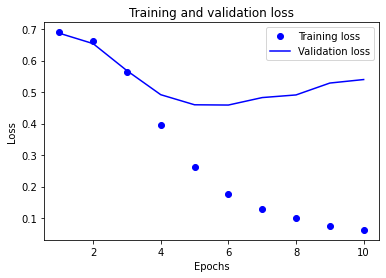

In [9]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

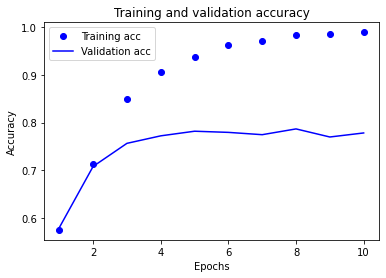

In [10]:
plt.clf()  

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()